# Thermo-mechanical analysis of energy piles


Pile foundations are one type of deep foundations, which are actually a slender columns or long cylinders mostly made of concrete , and are used to support the structure and transfer the load at desired depth either by end bearing to the bedrock or skin friction to the surrounding soil

Energy piles, also known as Heat Exchanger Piles (HEP) are dual application deep foundations that transfer buildings' loads to the soil while directly accessing naturally renewable subsurface geothermal resources. The temperature in the ground at depths of about 3 to 5 m is approximately equal to mean annual air temperature, thus providing a stable source for an efficient heat exchange between the superstructure and subsurface. A closed loop High Density Polyethylene (HDPE) tubing, which is embedded into reinforced concrete energy piles, serves as a conduit for a heat exchange fluid, thus enabling the heat extraction in the winter. Contrariwise, the heat exchange fluid is cooled in the subsurface during summer. Furthermore, by providing the access to directly usable renewable thermal energy HEPs contribute to a decreased emission of carbon dioxide into the atmosphere as compared to the complete reliance on burning fossil fuels. 

![Heat_piles_hres-1077x864](https://user-images.githubusercontent.com/60358074/74174277-4385bf00-4bf9-11ea-8bc5-a282374bf014.jpg)


$$(1)$$
As shown in figure 1 the piles are located below the building carrying the buildings' loads deep to the ground, while at the same time transfer heat from the ground to the building as a suplementary source for the building heating system. This trend is , however, converse in the summer, when the heat is being transfered from the building to the ground to help the building cool to some degrees.
As a result of the abovementioned process piles undergo two loads, mechanical directely applied from the building load and thermal, indirectly induced in the pile as the elongation and contarction of the pile due to the temperature difference is limited by the surrounding soil.

## Goal of this project

In order to be able to structurally design energy piles the displacement, strain and stress of the pile under all operating loads should be first assessed. In case of an energy pile these loads are consisted of mechnaical come from tha building, and thermal due to restriction of pile expansion and contarction in different temperatures. These factors can be calculated for each set of loads, either thermal or mechanical separately and then combined together, as one has no effect on the other once they are acting on the element at the same time.
In this project the governing equations are derived to calculate the displacement, strain and stress of the pile under thermal and mechanical loads separately and then combined together. After these ebing accomplished the physical properties and loads of any given pile can be given to th eprogram and axial displacement, strain and stress of the pile for two loads and combination of them will be plotted along the pile length. This way engineers will have a notion of what their proposed design will experience under operating condition, and helps them to optimise their design.

So the project is consisted of the following phases:
<br> 
$1$ - deriving the equations for the energy pile under pure thermal load
<br> 
$2$ - deriving the equations for the energy pile under pure mechanical load
<br> 
$3$ - combining the thermal and mechanical solutions by summing them to reach the solution for the case that piles undergoes both thermal and mechanical loading
<br> 
$4$ - take the desire pile properties and plot the response of the pile for mechanical, thermal and the combination on one plot, so that the effect of each is depicted and also the combination can be used for design purposes


### Importing required modules 

In [1]:
import sympy as sp
from sympy.abc import x
import matplotlib.pyplot as plt
import numpy as np
from numpy import cosh, sinh, exp
from sympy.utilities.lambdify import lambdify
import math

### Introducing functions and variables

Parameters of a pile that are needed for the equlibrium equations are needed to be introduced. For this purpose, sympy module is used to introduce variableas as parameters and functions.

$u$ : Axial displacement along the pile length
<br>
$x$ : Distance from the pile end in meters
<br>
$A$ : Cross section area of the energy pile in $m^2$
<br>
$P$ : perimeter of the pile in $m$
<br>
$D$ :  Diameter of the pile in $m$
<br>
$E$ : Module of elasticity of the pile material in $kPa$
<br>
$F$ : Mechanical force of the pile in $kN$, which has negative sign when it is compressive and positive when it is tensile
<br>
$k_s$ : Stiffness soil pile interface in $kPa$
<br>
$ \psi$ : parameter summarising the physical parameters of the paile and soil pile interface defined as follows:
$$ \psi= \sqrt((p/A)(k_s/E) )$$
<br>
$L$ : Length of the pile in $m$
<br>
$ \alpha$ : Coefficient of thermal expansion of the pile in 1/ degree celcius
<br>
$\Delta$T : Temperature differnce between the pile and surrounding soil in degrees celcius

In [2]:
u = sp.Function('u')
x = sp.Symbol('x') 
A = sp.Symbol ('A') 
P = sp.Symbol ('p') 
D = sp.Symbol ('D') 
E = sp.Symbol ('E')
F = sp.Symbol ('F') 
ks = sp.Symbol ('ks') 
psi = sp.Symbol ('psi') 
L = sp.Symbol ('L') 
alpha = sp.Symbol('alpha')
Delta_T = sp.Symbol ('Delta_T') 

## $1$ - Deriving the equations for the energy pile under pure thermal load

While free bars can expand and contract without any restriction under thermal loading. Energy piles  free thermal deformation  is restrained by the surrounding soil that displacement, stress and strain are induced in the pile during thermal loading.

<img src="thermal.PNG">
$$(2)$$

where Qs is the skin friction resulting from the restriction by surrounding soil, x is the distance from the pile tip and has the positive sign upward, hence any force, displacement or strain in upward direction is considered positive, while the negative sign implies them to be downward.
<br>
$ΔT$ positive implies that pile is under heating, and  when the pile is cooled then the sign negative will be assigned to $ΔT$ 
Taking the small portion of the pile length as shon in figure 2-a as $dx$ and analyse it in fig2-b.
<br> 
$ \tau$ in figure 2-b shows stress on the pile surface where it is in contact with soil. 
<br>
$ \sigma$ is the normal stress n the pile element caused by restriction to the pile expansion (in heating)


Solving the equilibrium of forces for te free body diagram in figure b results in the following equation:


$$ (d^2 u_i)/(dx_i^2 )- \psi^2 u_i=0  $$  
 where us is the axial displacement of the pile and x is distance from the pile tip as defned
to solve the differential equation the following boundary conditions are used:
<br>
As the pile is placed on an incompressible rock, the displacement of the pile tip (x=0) is restericted. Also since the pile head can move freely (x=L), and since strain is the derivative of displacement with regard to x, the following boundary conditions are used to solve the equation:

$$u(0) =0$$
$$ du/dx(L) = \alpha \Delta T $$
and u is the function that represents the axial displacement of the pile along its depth. and x is shown in th efigure as it is zero at the pile's tip and is positive upward.

### Defining and solving thermal governing equation for axial displacement under thermal loading

In [3]:
eq=sp.diff(u(x),x,x)-psi**2*u(x)  
u_thermal = sp.Function('u_thermal') 
u_thermal = sp.dsolve(eq,u(x), ics={u(0): 0, u(x).diff(x, 1).subs(x, L): ((alpha*Delta_T))}) 
u_thermal = u_thermal.rhs
u_thermal 


Delta_T*alpha*exp(psi*x)/(2*psi*cosh(L*psi)) - Delta_T*alpha*exp(-psi*x)/(2*psi*cosh(L*psi))

### Axial strain in energy pile under thermal loading

The axial strain is the first derivative of axial displacement with respect to x:

$$ \epsilon(x)=du/dx$$

In [4]:
epsilon_thermal = sp.diff (u_thermal,x)
epsilon_thermal 

Delta_T*alpha*exp(psi*x)/(2*cosh(L*psi)) + Delta_T*alpha*exp(-psi*x)/(2*cosh(L*psi))

### Axial stress in energy pile under thermal loading

The axial stress in the energy pile under thermal loading is derived from the following equation

$$ \sigma=E(\epsilon-\alpha \Delta T)$$

In [5]:
sigma_thermal = E*(epsilon_thermal-(alpha*Delta_T))
sigma_thermal 

E*(Delta_T*alpha*exp(psi*x)/(2*cosh(L*psi)) - Delta_T*alpha + Delta_T*alpha*exp(-psi*x)/(2*cosh(L*psi)))

## $2$ - deriving the equations for the energy pile under pure mechanical load

The free body diagram of the energy pile subjected to mechanical load is shown here

<img src="FBD.PNG">
$$(3)$$

Again Qs is the skin friction resulting from the restriction by surrounding soil, x is the distance from the pile tip and has the positive sign upward, hence any force, displacement or strain in upward direction is considered positive, while the negative sign implies them to be downward.
<br>
$F$ positive implies that the mechanical load is upward
Taking the small portion of the pile length as shon in figure 3-a as $dx$ and analyse it in fig3-b.
<br> 
$ \tau$ in figure 3-b shows stress on the pile surface where it is in contact with soil. 
<br>
$ \sigma$ is the normal stress n the pile element caused by restriction to the pile expansion (in heating)

Solving the equilibrium of forces for te free body diagram in figure b results in the following equation:
Again the same differetial equation emerges from the equlinrium of forces in the pile


$$ (d^2 u_i)/(dx_i^2 )- \psi^2 u_i=0  $$  

As the dosplacement of the pile tip (x=0) is restericted due to the incompressible rock, and strain at the pile head equals $F/AE$ the following boundary conditions are used to solve the equation for the mechanical load.

$$u(0) =0$$
$$ du/dx(L) =F/AE$$
and u is the function that represents the axial displacement of the pile along its depth. and x is shoon in th efigure as it is zero at the pile's tip and is positive upward.

### Defining and solving mechanical governing equation for axial displacement under thermal loading

In [6]:
eq=sp.diff(u(x),x,x)-psi**2*u(x)  # defining mentioned equation above using sympy
u_mechanical= sp.dsolve(eq,u(x), ics={u(0): 0, u(x).diff(x, 1).subs(x, L): ((F/(A*E)))}) #solving the differential equation with defined boundary condition
u_mechanical = u_mechanical.rhs
u_mechanical

F*exp(psi*x)/(2*A*E*psi*cosh(L*psi)) - F*exp(-psi*x)/(2*A*E*psi*cosh(L*psi))

### Axial strain in energy pile under mechanical loading

Again the axial strain is the first derivative of axial displacement with respect to x:

$$ \epsilon(x)=du/dx$$

In [7]:
espilon_mechanical = sp.diff(u_mechanical,x) 
espilon_mechanical

F*exp(psi*x)/(2*A*E*cosh(L*psi)) + F*exp(-psi*x)/(2*A*E*cosh(L*psi))

### calculating axial stress due to mechanical loading

this term that will be called mechanical stress hereafter is derived from the following equation
$$ \sigma(x)=E * \epsilon$$


In [8]:
sigma_mechanical = E * (espilon_mechanical)
sigma_mechanical

E*(F*exp(psi*x)/(2*A*E*cosh(L*psi)) + F*exp(-psi*x)/(2*A*E*cosh(L*psi)))

## $3$ - Combining the thermal and mechanical solutions 

Axial displacement, strain and stress of an energy pile under combination of thermal and mechanical load is sum of the mentioned values under each load separately



In [9]:
u_combined = ( u_thermal+ u_mechanical) 
u_combined

Delta_T*alpha*exp(psi*x)/(2*psi*cosh(L*psi)) - Delta_T*alpha*exp(-psi*x)/(2*psi*cosh(L*psi)) + F*exp(psi*x)/(2*A*E*psi*cosh(L*psi)) - F*exp(-psi*x)/(2*A*E*psi*cosh(L*psi))

In [10]:
epsilon_combined = epsilon_thermal + espilon_mechanical
epsilon_combined

Delta_T*alpha*exp(psi*x)/(2*cosh(L*psi)) + Delta_T*alpha*exp(-psi*x)/(2*cosh(L*psi)) + F*exp(psi*x)/(2*A*E*cosh(L*psi)) + F*exp(-psi*x)/(2*A*E*cosh(L*psi))

In [11]:
sigma_combined =sigma_thermal + sigma_mechanical
sigma_combined

E*(F*exp(psi*x)/(2*A*E*cosh(L*psi)) + F*exp(-psi*x)/(2*A*E*cosh(L*psi))) + E*(Delta_T*alpha*exp(psi*x)/(2*cosh(L*psi)) - Delta_T*alpha + Delta_T*alpha*exp(-psi*x)/(2*cosh(L*psi)))

### Turning solutions to functions

In order to be able to plot the solutions, we need to turn them into functions so they can be plotted versus x parameter.

In [12]:
u_thermal_func = lambdify([x,psi,alpha,Delta_T,L], u_thermal, "numpy")
epsilon_thermal_func = lambdify([x,psi,alpha,Delta_T,L], epsilon_thermal, "numpy")
sigma_thermal_func = lambdify([x,psi,alpha,Delta_T,E,L], sigma_thermal, "numpy")
u_mechanical_func = lambdify([x,psi,F,A,E,L], u_mechanical, "numpy")
epsilon_mechanical_func = lambdify([x,psi,F,A,E,L], espilon_mechanical, "numpy")
sigma_mechanical_func = lambdify([x,psi,F,A,E,L], sigma_mechanical, "numpy")
u_combined_func = lambdify([x,psi,alpha,Delta_T,F,A,E,L], u_combined, "numpy")
epsilon_combined_func = lambdify([x,psi,alpha,Delta_T,F,A,E,L], epsilon_combined, "numpy")
sigma_combined_func = lambdify([x,psi,alpha,Delta_T,F,A,E,L], sigma_combined, "numpy")

## $4$ Ploting displacement, strain and stress on the pile 
### inputing the pile parameters

As each pile has its own propoerties such as length, diameter, Elasticity modulus etc, in this section we get the parameters of each pile in order to plot the results for that specific pile

In [13]:
E = input (" Insert Elasticity modulus of the pile in kPa, for example :292000000")
L = input (" Insert pile's length in meters, for example : 26 ")
D = input (" Insert pile's diameter in m, for example: 1 ")
F = input (" Insert mechanical laod on the pile in kN, for example ±1000")
Delta_T = input (" Insert the temperature difference in celcius, for example ±14  ")
alpha = input ( " insert the coefficient of thermal expansion of the pile in 1/ degree celcius, for example: 10e-5")
ks = input ( " Stiffness of shear spring in soil pile interface in kPa/m,for example: 10800")

 Insert Elasticity modulus of the pile in kPa, for example :292000000 292000000
 Insert pile's length in meters, for example : 26  26
 Insert pile's diameter in m, for example: 1  1
 Insert mechanical laod on the pile in kN, for example ±1000 1000
 Insert the temperature difference in celcius, for example ±14   14
 insert the coefficient of thermal expansion of the pile in 1/ degree celcius, for example: 10e-5 10e-5
 Stiffness of shear spring in soil pile interface in kPa/m,for example: 10800 10800


then we should turn the input values into floats so we can use them in calculations

In [14]:
E = float (E) 
L = float (L) 
D = float (D) 
F = float (F) 
Delta_T = float (Delta_T) 
alpha = float (alpha)
ks = float (ks)

### calculating the $ \psi$ paremeter
as mentioned before $ \psi$ is a parameter represinting the physical properties of the pile as follows:

$$ \psi= \sqrt((p/A)(k_s/E) )$$


In [15]:
A = math.pi * (D/2)**2
p = math.pi *  D
psi = math.sqrt ((p/A) * ((float(ks))/float(E)))

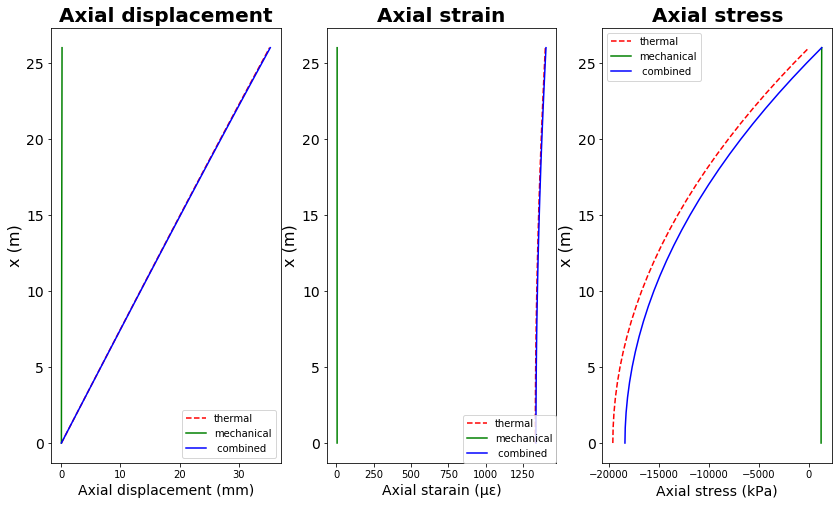

In [16]:
x = np.arange(0., L+1.)
plt.figure(figsize=(14, 8))
plt.subplot(131)
plt.plot(1000 * (u_thermal_func (x,psi,alpha,Delta_T,L)),x,'r--',1000*(u_mechanical_func (x,psi,F,A,E,L)),x,'g', 1000*(u_combined_func (x,psi,alpha,Delta_T,F,A,E,L)),x,'b')
plt.title('Axial displacement', size=20, fontweight='bold')
plt.xlabel("Axial displacement (mm)", size=14)
plt.ylabel("x (m)", size=16)
plt.yticks(fontsize=14)
plt.legend(['thermal' ,'mechanical' ,' combined'],fontsize=10)
plt.subplot(132)
plt.plot(1000000 * (epsilon_thermal_func (x,psi,alpha,Delta_T,L)),x,'r--',1000000*(epsilon_mechanical_func (x,psi,F,A,E,L)),x,'g', 1000000*(epsilon_combined_func (x,psi,alpha,Delta_T,F,A,E,L)),x, 'b')
plt.title('Axial strain', size=20, fontweight='bold')
plt.xlabel("Axial starain (με)", size=14)
plt.ylabel("x (m)", size=16)
plt.yticks(fontsize=14)
plt.legend(['thermal' ,'mechanical' ,' combined'],fontsize=10, loc = 'lower right',borderaxespad=0)
plt.subplot(133)
plt.plot( sigma_thermal_func (x,psi,alpha,Delta_T,E,L),x,'r--',sigma_mechanical_func (x,psi,F,A,E,L),x,'g', sigma_combined_func (x,psi,alpha,Delta_T,F,A,E,L),x, 'b')
plt.title('Axial stress', size=20, fontweight='bold')
plt.xlabel("Axial stress (kPa)", size=14)
plt.ylabel("x (m)", size=16)
plt.yticks(fontsize=14)
plt.legend(['thermal' ,'mechanical' ,' combined'],fontsize=10, loc = 'upper left')
plt.show()


## Rerefence
Perić, D., Cossel, A. E., & Sarna, S. A. (2020). Analytical Solutions for Thermomechanical Soil Structure Interaction in End-Bearing Energy Piles. Journal of Geotechnical and Geoenvironmental Engineering, 146(7), 04020047.